In [66]:
%matplotlib inline

In [67]:
import os
import sys
import abc
import inspect
import argparse
import numpy as np
import pandas as pd
import sklearn.datasets as skd
import sklearn.cluster as skc
import sklearn.metrics as skm
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

In [68]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.spatial.distance import cdist
from copy import deepcopy
from matplotlib.patches import Ellipse
from pandas.plotting import scatter_matrix

In [69]:
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [70]:
# warnings.filterwarnings("ignore")

In [71]:
from dfncluster.dFNC import dFNC
from dfncluster.Classifiers import Polyssifier
from dfncluster.Clusterer import KMeansClusterer,Clusterer
from dfncluster.Dataset import FNCDataset

In [72]:
from data.SklearnDatasets import Iris, Classification, MNIST, Moons

In [73]:
ALLOWED_KWARGS = [
    'n_clusters',
    'init',
    'n_init',
    'max_iter',
    'tol',
    'precompute_distances',
    'verbose',
    'random_state',
    'copy_x',
    'n_jobs',
    'algorithm'
]
DATASETS = dict(
    iris=Iris.make,
    classification=Classification.make,
    mnist=MNIST.make,
    moons=Moons.make
)
METRICS = [
    'calinksi_harabaz',
    'davies_bouldin',
    'silhouette',
    # 'mean_euclid',
    # 'mean_city',
]
metrics=",".join(METRICS)
print("metrics:",metrics)
dataset='iris'
dataset = DATASETS[dataset.lower()]()

metrics: calinksi_harabaz,davies_bouldin,silhouette
load_iris
Feature Shape (150, 4)
Label Shape (150, 1)


In [74]:
print("dataset:",dataset)

dataset: <dfncluster.Dataset.SklearnDataset.SklearnDataset object at 0x7fd3d9b65c10>


In [75]:
print("dataset.features:",dataset.features)

dataset.features: [[5.  2.  3.5 1. ]
 [4.8 3.1 1.6 0.2]
 [7.  3.2 4.7 1.4]
 [6.9 3.1 5.1 2.3]
 [7.7 2.6 6.9 2.3]
 [4.9 3.1 1.5 0.2]
 [6.1 2.9 4.7 1.4]
 [6.  2.9 4.5 1.5]
 [6.  2.7 5.1 1.6]
 [5.  3.3 1.4 0.2]
 [4.6 3.2 1.4 0.2]
 [6.3 3.4 5.6 2.4]
 [6.8 2.8 4.8 1.4]
 [4.4 3.2 1.3 0.2]
 [5.7 2.8 4.1 1.3]
 [7.7 2.8 6.7 2. ]
 [6.7 3.  5.  1.7]
 [6.3 2.8 5.1 1.5]
 [6.1 2.8 4.7 1.2]
 [5.6 3.  4.1 1.3]
 [5.4 3.  4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [5.  3.2 1.2 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.5 1.4 0.3]
 [5.4 3.7 1.5 0.2]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.5 0.3]
 [5.2 3.5 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.9 4.2 1.3]
 [4.7 3.2 1.3 0.2]
 [5.1 2.5 3.  1.1]
 [4.7 3.2 1.6 0.2]
 [7.3 2.9 6.3 1.8]
 [5.5 2.5 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [6.4 3.2 5.3 2.3]
 [6.4 3.1 5.5 1.8]
 [6.2 2.2 4.5 1.5]
 [6.9 3.1 5.4 2.1]
 [7.2 3.6 6.1 2.5]
 [5.1 3.4 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [6.2 2.9 4.3 1.3]
 [6.9 3.2 5.7 2.3]
 [5.3 3.7 1.5 0.2]
 [6.7 3.1 5.6 2.4]
 [5.4 3.4 1.5 0.4]
 [6.3 3.3 4.7 1.6]
 [5.4 3.9 1.3 0.4]
 [4.6 3.1 1.5

In [76]:
print("dataset.labels:",dataset.labels)

dataset.labels: [[1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [2]
 [2]]


In [77]:
pd_d = pd.DataFrame(dataset.features)
pd_d.sample(5)

,0,1,2,3
100,6.8,3.0,5.5,2.1
123,4.8,3.0,1.4,0.3
68,5.8,2.7,4.1,1.0
115,5.7,3.8,1.7,0.3
81,6.1,2.8,4.0,1.3


In [78]:
pd_l = pd.DataFrame(dataset.labels)
pd_l.sample(5)

,0
47,2
98,2
37,2
131,1
3,2


In [79]:
clusterer = KMeansClusterer(X=dataset.features, Y=dataset.labels, metrics=metrics, num_clusters=5)
clusterer.fit()
results = clusterer.evaluate()
print(results)

Evaluating clustering with metric c
Evaluating clustering with metric a
Evaluating clustering with metric l
Evaluating clustering with metric i
Evaluating clustering with metric n
Evaluating clustering with metric k
Evaluating clustering with metric s
Evaluating clustering with metric i
Evaluating clustering with metric _
Evaluating clustering with metric h
Evaluating clustering with metric a
Evaluating clustering with metric r
Evaluating clustering with metric a
Evaluating clustering with metric b
Evaluating clustering with metric a
Evaluating clustering with metric z
Evaluating clustering with metric ,
Evaluating clustering with metric d
Evaluating clustering with metric a
Evaluating clustering with metric v
Evaluating clustering with metric i
Evaluating clustering with metric e
Evaluating clustering with metric s
Evaluating clustering with metric _
Evaluating clustering with metric b
Evaluating clustering with metric o
Evaluating clustering with metric u
Evaluating clustering with m

In [80]:
class GMMClusterer(Clusterer):
    def __init__(self, **kwargs):
        super(GMMClusterer, self).__init__(**kwargs)
        if self.centroids is not None:
            kwargs['init'] = self.centroids
        self.model = skc.mixture.GaussianMixture(**{k:v for k,v in kwargs.items() if k in ALLOWED_KWARGS})

    def fit(self):
        self.model.fit(self.X, self.Y)
        self.centroids = self.model.cluster_centers_
        self.assignments = self.model.labels_

In [81]:
fnc_omg_sim_ds = FNCDataset.load('../../data/FNCDatasets/OmegaSim/omega_sim.npy')
skl_moon_ds = FNCDataset.load('../../data//SklearnDatasets/Moons/moons.npy')
skl_iris_ds = FNCDataset.load('../../data//SklearnDatasets/Iris/iris.npy')
skl_blobs_ds = FNCDataset.load('../../data//SklearnDatasets/Blobs/blobs.npy')
skl_class_ds = FNCDataset.load('../../data//SklearnDatasets/Classification/classification.npy')
skl_mnist_ds = FNCDataset.load('../../data//SklearnDatasets/MNIST/mnist.npy')

In [82]:
print("fnc_omg_sim_ds:",fnc_omg_sim_ds)
print("skl_moon_ds:",skl_moon_ds)
print("skl_iris_ds:",skl_iris_ds)
print("skl_blobs_ds:",skl_blobs_ds)
print("skl_class_ds:",skl_class_ds)
print("skl_mnist_ds:",skl_mnist_ds)

fnc_omg_sim_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b13450>
skl_moon_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b132d0>
skl_iris_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b87f90>
skl_blobs_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b1c390>
skl_class_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b13890>
skl_mnist_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7fd3d9b13490>


In [83]:
print("type(fnc_omg_sim_ds):",type(fnc_omg_sim_ds))
print("type(fnc_omg_sim_ds.features):",type(fnc_omg_sim_ds.features))
print("type(fnc_omg_sim_ds.labels):",type(fnc_omg_sim_ds.labels))
print("fnc_omg_sim_ds.features.shape:",fnc_omg_sim_ds.features.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
print("fnc_omg_sim_ds.features:",fnc_omg_sim_ds.features)
print("fnc_omg_sim_ds.labels:",fnc_omg_sim_ds.labels)

type(fnc_omg_sim_ds): <class 'dfncluster.Dataset.FNCDataset.FNCDataset'>
type(fnc_omg_sim_ds.features): <class 'numpy.ndarray'>
type(fnc_omg_sim_ds.labels): <class 'numpy.ndarray'>
fnc_omg_sim_ds.features.shape: (466944, 55)
fnc_omg_sim_ds.labels.shape: (466944, 1)
fnc_omg_sim_ds.features: [[ 1.         -0.1745931  -0.14668377 ...  1.         -0.15118515
   1.        ]
 [ 1.          0.16827016  0.11046061 ...  1.         -0.06231507
   1.        ]
 [ 1.         -0.50772085 -0.0388995  ...  1.          0.26997111
   1.        ]
 ...
 [ 1.          0.60522456 -0.20970329 ...  1.         -0.00873832
   1.        ]
 [ 1.         -0.3264642   0.01403594 ...  1.          0.03176851
   1.        ]
 [ 1.         -0.32729087  0.07675581 ...  1.         -0.30055139
   1.        ]]
fnc_omg_sim_ds.labels: [[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [84]:
data = pd.read_csv('../../data/FNCDatasets/OmegaSim/data.csv')
print("type(data):",type(data))
data.sample(5)
print("data:",data)

type(data): <class 'pandas.core.frame.DataFrame'>
data:            subject_id  diagnosis  \
0        hc_subject_0          0   
1        sz_subject_0          1   
2        hc_subject_1          0   
3        sz_subject_1          1   
4        hc_subject_2          0   
...               ...        ...   
2043  sz_subject_1040          1   
2044  hc_subject_1041          0   
2045  sz_subject_1041          1   
2046  hc_subject_1042          0   
2047  sz_subject_1042          1   

                                                 ica_tc  
0     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
1     data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
2     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
3     data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
4     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
...                                                 ...  
2043  data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
2044  data/FNCDatasets/OmegaSim/subjects/hc_sub

In [85]:
mat = scipy.io.loadmat('/home/jitendra/Desktop/mlCs7641Spring2020/project/spring2020/grprj/20200320_git/dfncluster/data/FNCDatasets/OmegaSim/subjects/hc_subject_0.mat')
print("mat:",type(mat))
for key, value in mat.items() :
    print (key)
print("mat:",mat)

mat: <class 'dict'>
__header__
__version__
__globals__
TC
mat: {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar  5 09:59:25 2020', '__version__': '1.0', '__globals__': [], 'TC': array([[-2.72354301, -0.09698426,  2.93962051, ...,  0.49306869,
        -1.68084593,  0.42884779],
       [-0.47728405,  4.31409453,  0.78009711, ...,  1.68099367,
         2.88172432, -0.5835303 ],
       [ 2.42417433,  0.93776508, -0.92403109, ..., -1.88944391,
         1.67690019, -3.12080356],
       ...,
       [-0.54389254, -1.00687024,  1.61654616, ...,  0.38351467,
        -0.30728288,  2.96880202],
       [-0.03200204, -0.61387053, -1.03523179, ...,  2.30081054,
         0.61548138,  0.17472277],
       [ 0.43145841,  0.72451249, -1.38082123, ..., -2.4654087 ,
        -1.35266997, -2.0885216 ]])}


In [86]:
mat = scipy.io.loadmat('/home/jitendra/Desktop/mlCs7641Spring2020/project/spring2020/grprj/20200320_git/dfncluster/data/FNCDatasets/OmegaSim/subjects/sz_subject_0.mat')
print("mat:",type(mat))
for key, value in mat.items() :
    print (key)
print("mat:",mat)

mat: <class 'dict'>
__header__
__version__
__globals__
TC
mat: {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar  5 09:59:25 2020', '__version__': '1.0', '__globals__': [], 'TC': array([[-0.84583535, -0.29927808, -0.75459436, ...,  1.17950046,
        -2.12391667,  0.77481705],
       [ 0.74629973, -1.24436502,  1.92900753, ...,  0.61001418,
        -0.42067165,  3.71469709],
       [ 0.24945254,  0.30527389,  1.76620956, ...,  0.85032908,
        -0.1106838 , -1.85578182],
       ...,
       [ 0.51738939, -1.39763765,  1.53748178, ...,  2.9020796 ,
        -0.40124015,  1.52557897],
       [ 0.32697769, -0.16274691,  0.25059757, ...,  0.32704819,
         0.38316728, -0.01187249],
       [ 0.1126536 , -0.35077703,  2.17597767, ..., -0.96942425,
        -0.67455   ,  1.45356341]])}


In [87]:
uniqueValues, occurCount = np.unique(fnc_omg_sim_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [233472 233472]


In [88]:
seed = 0
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(fnc_omg_sim_ds.features)
X_pca_array = pca.transform(fnc_omg_sim_ds.features)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
X_pca.sample(5)

,PC1,PC2
366811,-0.212975,0.034679
417555,-0.094960,0.059025
294658,0.082642,0.096200
164865,-0.220112,0.009393
238788,0.487799,0.046735


In [89]:
nclusters=2
gmm_sim = GaussianMixture(n_components=nclusters)
gmm_sim.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [90]:
gmm_sim_pred = gmm_sim.predict(fnc_omg_sim_ds.features)

In [91]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

gmm_sim_pred: [0 0 1 ... 0 1 0]
type(gmm_sim_pred): <class 'numpy.ndarray'>
gmm_sim_pred.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score: 3.957880559754719e-05


In [92]:
score = sklearn.metrics.silhouette_score(fnc_omg_sim_ds.features, gmm_sim_pred)
print("score:",score)

score: 0.013122062121172041


In [93]:
nclusters=15
gmm_sim_15 = GaussianMixture(n_components=nclusters)
gmm_sim_15.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=15, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [94]:
gmm_sim_pred_15 = gmm_sim_15.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_15:",gmm_sim_pred_15)
print("type(gmm_sim_pred_15):",type(gmm_sim_pred_15))
print("gmm_sim_pred_15.shape:",gmm_sim_pred_15.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_15 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_15)
print("score_15:",score_15)

gmm_sim_pred_15: [ 5  2  6 ...  3 11  6]
type(gmm_sim_pred_15): <class 'numpy.ndarray'>
gmm_sim_pred_15.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_15: 4.524734094921142e-05


In [95]:
nclusters=25
gmm_sim_25 = GaussianMixture(n_components=nclusters)
gmm_sim_25.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=25, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [96]:
gmm_sim_pred_25 = gmm_sim_25.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_25:",gmm_sim_pred_25)
print("type(gmm_sim_pred_25):",type(gmm_sim_pred_25))
print("gmm_sim_pred_25.shape:",gmm_sim_pred_25.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_25 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_25)
print("score_25:",score_25)

gmm_sim_pred_25: [ 2  1  3 ...  8  0 17]
type(gmm_sim_pred_25): <class 'numpy.ndarray'>
gmm_sim_pred_25.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_25: 4.5969619554920564e-05


In [97]:
nclusters=35
gmm_sim_35 = GaussianMixture(n_components=nclusters)
gmm_sim_35.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=35, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [98]:
gmm_sim_pred_35 = gmm_sim_35.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_35:",gmm_sim_pred_35)
print("type(gmm_sim_pred_35):",type(gmm_sim_pred_35))
print("gmm_sim_pred_35.shape:",gmm_sim_pred_35.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_35 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_35)
print("score_35:",score_35)

gmm_sim_pred_35: [13  8 13 ... 28 18  5]
type(gmm_sim_pred_35): <class 'numpy.ndarray'>
gmm_sim_pred_35.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_35: 3.873665478788384e-05


In [100]:
score = sklearn.metrics.silhouette_score(fnc_omg_sim_ds.features, gmm_sim_pred_35)
print("score:",score)

score: 0.0035443859792110015


In [101]:
print("skl_moon_ds.features.shape:",skl_moon_ds.features.shape)
print("skl_moon_ds.labels.shape:",skl_moon_ds.labels.shape)
print("skl_moon_ds.features:",skl_moon_ds.features)
print("skl_moon_ds.labels:",skl_moon_ds.labels)

skl_moon_ds.features.shape: (10000, 2)
skl_moon_ds.labels.shape: (10000, 1)
skl_moon_ds.features: [[ 0.37015072 -0.29277974]
 [ 2.00265675  0.46796006]
 [ 0.56763969  0.81640019]
 ...
 [ 1.83812113 -0.04031537]
 [ 0.28999506 -0.20792528]
 [ 1.99376775  0.24368273]]
skl_moon_ds.labels: [[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [102]:
print("skl_iris_ds.features.shape:",skl_iris_ds.features.shape)
print("skl_iris_ds.labels.shape:",skl_iris_ds.labels.shape)
print("skl_iris_ds.features:",skl_iris_ds.features)
print("skl_iris_ds.labels:",skl_iris_ds.labels)


skl_iris_ds.features.shape: (150, 4)
skl_iris_ds.labels.shape: (150, 1)
skl_iris_ds.features: [[5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [5.  3.3 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.9 3.  4.2 1.5]
 [6.  2.2 5.  1.5]
 [5.1 3.5 1.4 0.3]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [5.8 4.  1.2 0.2]
 [4.7 3.2 1.6 0.2]
 [7.1 3.  5.9 2.1]
 [4.3 3.  1.1 0.1]
 [4.4 3.2 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.9 2.4 3.3 1. ]
 [7.7 2.8 6.7 2. ]
 [6.3 2.5 4.9 1.5]
 [5.4 3.  4.5 1.5]
 [6.9 3.1 5.1 2.3]
 [6.1 2.9 4.7 1.4]
 [6.6 3.  4.4 1.4]
 [5.5 2.4 3.7 1. ]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 3.9 1.2]
 [5.5 3.5 1.3 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 2.5 5.  2. ]
 [6.5 2.8 4.6 1.5]
 [6.4 2.8 5.6 2.2]
 [6.8 2.8 4.8 1.4]
 [4.4 3.  1.3 0.2]
 [7.2 3.  5.8 1.6]
 [6.2 2.8 4.8 1.8]
 [6.1 2.8 4.7 1.2]
 [5.1 3.3 1.7 0.5]
 [5.  3.6 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [6.4 2.8 5.6 2.1]
 [5.  3.5 1.6 0.6]
 [6.  3.  4.8 1.8]
 [5.6 3.  4.1 1.3]
 [5.9 3.  5.1 1.8]
 [5.5 2.5 4.  1.3]
 [6.3 2.9 5.6 1.8]
 [5.7 2.9 4.2

In [103]:
nclusters=5
gmm_sim = GaussianMixture(n_components=nclusters)
gmm_sim.fit(skl_iris_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [104]:
gmm_sim_pred = gmm_sim.predict(skl_iris_ds.features)

In [105]:
score = sklearn.metrics.silhouette_score(skl_iris_ds.features, gmm_sim_pred)
print("score:",score)

score: 0.22753281534859818


In [106]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",skl_iris_ds.labels.shape)
score = adjusted_rand_score(skl_iris_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

gmm_sim_pred: [4 2 2 3 2 2 0 3 2 2 3 4 2 3 2 2 2 0 3 1 0 3 0 1 0 4 0 4 2 1 1 3 1 2 3 1 0
 4 2 3 3 4 1 0 3 0 3 0 4 1 0 3 3 1 0 3 3 4 3 3 0 4 3 3 3 4 3 0 3 0 0 0 3 4
 3 3 2 0 0 2 0 2 0 1 3 3 0 3 2 3 0 2 3 2 2 3 1 3 3 0 1 2 0 2 0 2 0 3 4 2 1
 2 2 1 2 3 1 2 1 0 1 3 3 1 3 3 2 0 3 3 1 2 2 4 0 3 2 2 2 1 0 3 0 0 3 4 4 2
 3 1]
type(gmm_sim_pred): <class 'numpy.ndarray'>
gmm_sim_pred.shape: (150,)
fnc_omg_sim_ds.labels.shape: (150, 1)
score: 0.6788650107318116


In [108]:
seed = 0
nclusters = 3
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_iris_ds.features)
y_cluster_kmeans = km.predict(skl_iris_ds.features)
score = sklearn.metrics.silhouette_score(skl_iris_ds.features, y_cluster_kmeans)
print("score:",score)
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_iris_ds.labels.shape:",skl_iris_ds.labels.shape)
score = adjusted_rand_score(skl_iris_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

score: 0.552819012356409
y_cluster_kmeans: [1 1 1 0 1 1 2 2 1 1 0 1 1 0 1 1 1 2 0 2 2 0 2 2 2 1 2 1 1 2 2 0 2 1 0 2 2
 1 1 0 0 1 2 2 2 2 0 2 1 2 2 0 0 2 2 2 0 1 0 0 2 1 0 2 0 1 0 2 2 2 2 2 0 1
 0 0 1 2 2 1 2 1 2 2 0 2 2 2 1 0 2 1 2 1 1 0 0 2 0 2 0 1 2 1 2 1 2 0 1 1 2
 1 1 2 1 0 2 1 2 2 2 0 0 2 0 0 1 2 0 0 2 1 1 1 2 2 1 1 1 2 2 0 2 2 0 1 1 1
 0 2]
type(y_cluster_kmeans): <class 'numpy.ndarray'>
y_cluster_kmeans.shape: (150,)
skl_iris_ds.labels.shape: (150, 1)
score: 0.7302382722834697


In [109]:
nclusters=3
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [110]:
gmm_sim.fit(skl_iris_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [111]:
gmm_sim.fit(skl_iris_ds.features,skl_iris_ds.labels)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [112]:
gmm_sim_pred = gmm_sim.predict(skl_iris_ds.features)

In [114]:
score = sklearn.metrics.silhouette_score(skl_iris_ds.features, gmm_sim_pred)
print("score:",score)

score: 0.5011761635067201


In [115]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",skl_iris_ds.labels.shape)
score = adjusted_rand_score(skl_iris_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

gmm_sim_pred: [1 1 1 0 1 1 2 0 1 1 0 1 1 0 1 1 1 2 0 0 2 0 2 2 2 1 2 1 1 0 2 0 2 1 0 0 2
 1 1 0 0 1 0 2 0 2 0 2 1 2 2 0 0 2 2 0 0 1 0 0 2 1 0 0 0 1 0 2 0 2 2 2 0 1
 0 0 1 2 2 1 2 1 2 0 0 0 2 0 1 0 2 1 0 1 1 0 2 0 0 2 0 1 2 1 2 1 2 0 1 1 2
 1 1 2 1 0 0 1 2 2 2 0 0 0 0 0 1 2 0 0 2 1 1 1 2 0 1 1 1 2 2 0 2 2 0 1 1 1
 0 0]
type(gmm_sim_pred): <class 'numpy.ndarray'>
gmm_sim_pred.shape: (150,)
fnc_omg_sim_ds.labels.shape: (150, 1)
score: 0.9038742317748124


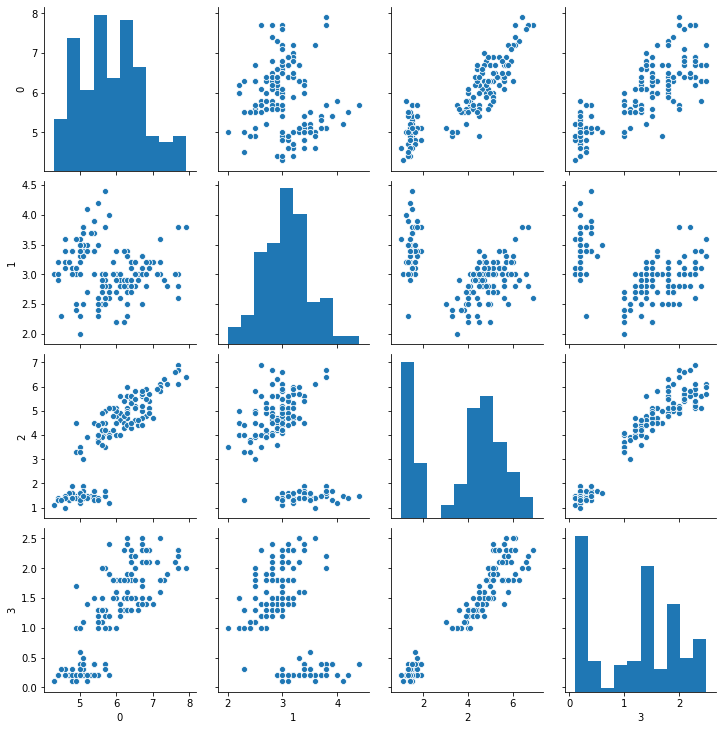

In [116]:
sns.pairplot(pd_d)

/home/jitendra/anaconda3/envs/dfncluster/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3d7bc39d0>,
      dtype=object)

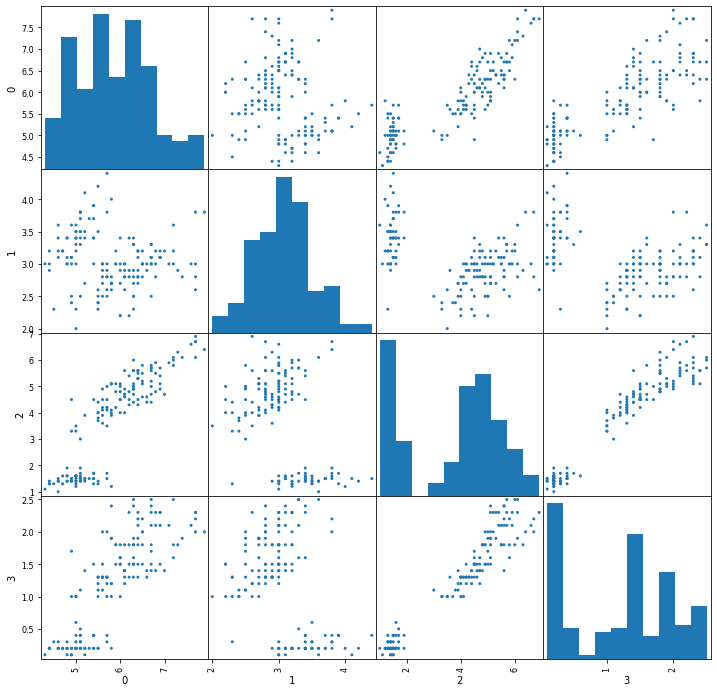

In [117]:
fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(pd_d, alpha=1, ax=ax)

In [118]:
print("skl_blobs_ds.features.shape:",skl_blobs_ds.features.shape)
print("skl_blobs_ds.labels.shape:",skl_blobs_ds.labels.shape)
print("skl_blobs_ds.features:",skl_blobs_ds.features)
print("skl_blobs_ds.labels:",skl_blobs_ds.labels)

skl_blobs_ds.features.shape: (10000, 100)
skl_blobs_ds.labels.shape: (10000, 1)
skl_blobs_ds.features: [[-1.08732587 -5.76638905  9.48396988 ...  5.04749512 -8.29478964
  -6.61829534]
 [-3.30662458 -6.05041766  7.64052374 ...  5.50224845 -4.63167453
  -6.24641838]
 [-3.93054488 -6.62332244  9.61454209 ...  5.64551832 -5.65352834
  -4.17020356]
 ...
 [ 5.73352173  0.26432793 -0.79984645 ...  9.66982487  1.43009063
  -7.83767464]
 [ 7.17326415 -0.3200327  -2.57061047 ...  9.52757739  1.59772108
  -5.76427924]
 [ 5.07560905  2.04131213 -3.03242401 ... 11.06674161  2.70830961
  -5.64553984]]
skl_blobs_ds.labels: [[2]
 [2]
 [2]
 ...
 [0]
 [0]
 [0]]


In [119]:
print("skl_class_ds.skl_class_ds.shape:",skl_class_ds.features.shape)
print("skl_class_ds.skl_class_ds.shape:",skl_class_ds.labels.shape)
print("skl_class_ds.features:",skl_class_ds.features)
print("skl_class_ds.labels:",skl_class_ds.labels)

skl_class_ds.skl_class_ds.shape: (10000, 100)
skl_class_ds.skl_class_ds.shape: (10000, 1)
skl_class_ds.features: [[ -5.45230444   0.16889602   1.70132749 ... -10.6594281   -0.27519476
  -29.19567438]
 [  4.62404496  -4.85433398   0.7764227  ...  36.18539254 -14.30511917
  -14.98805613]
 [  7.0278784    0.71926292   0.94657665 ...   7.57212681 -21.02406219
    0.46579986]
 ...
 [  6.97967854  -7.65575302   2.66236184 ...  30.43490698   0.98697516
  -19.78357638]
 [  2.96200762   6.82514558  -2.05632839 ...  14.09989088   1.38359896
  -17.3586786 ]
 [ -2.40166359  -6.44812183  -0.05840816 ...   4.34888641   5.21259653
   -6.76369426]]
skl_class_ds.labels: [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [120]:
print("skl_mnist_ds.features.shape:",skl_mnist_ds.features.shape)
print("skl_mnist_ds.labels.shape:",skl_mnist_ds.labels.shape)
print("skl_mnist_ds.features:",skl_mnist_ds.features)
print("skl_mnist_ds.labels:",skl_mnist_ds.labels)

skl_mnist_ds.features.shape: (70000, 784)
skl_mnist_ds.labels.shape: (70000, 1)
skl_mnist_ds.features: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
skl_mnist_ds.labels: [['6']
 ['9']
 ['0']
 ...
 ['7']
 ['4']
 ['4']]
